# **Import Dependencies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Import Dataset**

In [4]:
ss = pd.read_excel('/content/sample_data/SuperStore.xlsx')
ss.head()

# Level Granularity:
# -  Customer ID
#  -  Order_ID
#   -  Category
#    -  Sub-Category
#     -  Product_ID - Product_Name

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


# **Summary Data**

In [5]:
sum_category = pd.pivot_table(
  data=ss,
  index='Category',
  values='Sales',
  aggfunc='sum'
)
sum_category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [6]:
sum_cat_sku = pd.pivot_table(
  data=ss,
  index= ['Category', 'Product_Name'],
  values='Sales',
  aggfunc='sum'
)
sum_cat_sku

Sales
Category   Product_Name                                                
Furniture  12-1/2 Diameter Round Wall Clock                     551.448
           24-Hour Round Wall Clock                             487.512
           36X48 HARDFLOOR CHAIRMAT                             369.248
           3M Hangers With Command Adhesive                     108.040
           3M Polarizing Light Filter Sleeves                   216.340
...                                                                 ...
Technology iKross Bluetooth Portable Keyboard + Cell Phone...   477.660
           iOttie HLCRIO102 Car Mount                           215.892
           iOttie XL Car Mount                                  223.888
           invisibleSHIELD by ZAGG Smudge-Free Screen Prot...   442.554
           netTALK DUO VoIP Telephone Service                  1112.788

[1817 rows x 1 columns]

In [7]:
sum_cat_sku = pd.pivot_table(
  data=ss,
  index= ['Category', 'Product_Name', 'Sub-Category'],
  values='Sales',
  aggfunc='sum'
)
sum_cat_sku

Sales
Category   Product_Name                                       Sub-Category          
Furniture  12-1/2 Diameter Round Wall Clock                   Furnishings    551.448
           24-Hour Round Wall Clock                           Furnishings    487.512
           36X48 HARDFLOOR CHAIRMAT                           Furnishings    369.248
           3M Hangers With Command Adhesive                   Furnishings    108.040
           3M Polarizing Light Filter Sleeves                 Furnishings    216.340
...                                                                              ...
Technology iKross Bluetooth Portable Keyboard + Cell Phone... Phones         477.660
           iOttie HLCRIO102 Car Mount                         Phones         215.892
           iOttie XL Car Mount                                Phones         223.888
           invisibleSHIELD by ZAGG Smudge-Free Screen Prot... Phones         442.554
           netTALK DUO VoIP Telephone Service                 Phones        1112.788

[1817 rows x 1 columns]

In [8]:
sum_cat_sku = pd.pivot_table(
  data=ss,
  index= ['Category', 'Sub-Category', 'Product_Name'],
  values='Sales',
  aggfunc= ['sum', 'mean']
)
sum_cat_sku

sum  \
                                                                                Sales   
Category   Sub-Category Product_Name                                                    
Furniture  Bookcases    Atlantic Metals Mobile 2-Shelf Bookcases, Custo...   400.0268   
                        Atlantic Metals Mobile 3-Shelf Bookcases, Custo...  7539.7122   
                        Atlantic Metals Mobile 4-Shelf Bookcases, Custo...  5184.0810   
                        Atlantic Metals Mobile 5-Shelf Bookcases, Custo...  5492.8850   
                        Bestar Classic Bookcase                             1897.8102   
...                                                                               ...   
Technology Phones       iKross Bluetooth Portable Keyboard + Cell Phone...   477.6600   
                        iOttie HLCRIO102 Car Mount                           215.8920   
                        iOttie XL Car Mount                                  223.8880   
                        invisibleSHIELD by ZAGG Smudge-Free Screen Prot...   442.5540   
                        netTALK DUO VoIP Telephone Service                  1112.7880   

                                                                                  mean  
                                                                                 Sales  
Category   Sub-Category Product_Name                                                    
Furniture  Bookcases    Atlantic Metals Mobile 2-Shelf Bookcases, Custo...  200.013400  
                        Atlantic Metals Mobile 3-Shelf Bookcases, Custo...  942.464025  
                        Atlantic Metals Mobile 4-Shelf Bookcases, Custo...  864.013500  
                        Atlantic Metals Mobile 5-Shelf Bookcases, Custo...  686.610625  
                        Bestar Classic Bookcase                             237.226275  
...                                                                                ...  
Technology Phones       iKross Bluetooth Portable Keyboard + Cell Phone...   95.532000  
                        iOttie HLCRIO102 Car Mount                           43.178400  
                        iOttie XL Car Mount                                 111.944000  
                        invisibleSHIELD by ZAGG Smudge-Free Screen Prot...   63.222000  
                        netTALK DUO VoIP Telephone Service                  158.969714  

[1817 rows x 2 columns]

In [9]:
ss[['Category', 'Product_Name', 'Sales']].head()

,Category,Product_Name,Sales
0,Furniture,Bush Somerset Collection Bookcase,261.9600
1,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
ss[['Category', 'Product_Name', 'Sales']].sort_values(['Category', 'Product_Name']).head()

,Category,Product_Name,Sales
669,Furniture,12-1/2 Diameter Round Wall Clock,23.976
754,Furniture,12-1/2 Diameter Round Wall Clock,79.920
2541,Furniture,12-1/2 Diameter Round Wall Clock,111.888
2719,Furniture,12-1/2 Diameter Round Wall Clock,23.976
2789,Furniture,12-1/2 Diameter Round Wall Clock,39.960


In [11]:
ss.head()

# Level Granularity:
# -  Customer ID
#  -  Order_ID
#   -  Category
#    -  Sub-Category
#     -  Product_ID - Product_Name

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [12]:
sum_cat_sku.reset_index()

,Category,Sub-Category,Product_Name,sum,mean
,,,,Sales,Sales
0,Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",400.0268,200.013400
1,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",7539.7122,942.464025
2,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",5184.0810,864.013500
3,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",5492.8850,686.610625
4,Furniture,Bookcases,Bestar Classic Bookcase,1897.8102,237.226275
...,...,...,...,...,...
1812,Technology,Phones,iKross Bluetooth Portable Keyboard + Cell Phon...,477.6600,95.532000
1813,Technology,Phones,iOttie HLCRIO102 Car Mount,215.8920,43.178400
1814,Technology,Phones,iOttie XL Car Mount,223.8880,111.944000


# **PIVOT TABLE**

In [13]:
popular_product = pd.pivot_table(
  ss,
  index=  'Product_Name',
  values='Order_ID',
  aggfunc='count'
).sort_values('Order_ID', ascending=False).head()

In [14]:
popular_product

,Order_ID
Product_Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19


In [15]:
popular_product = pd.pivot_table(
  ss,
  index=  'Product_Name',
  values='Order_ID',
  aggfunc='count'
).sort_values('Order_ID', ascending=False)

In [16]:
popular_product

,Order_ID
Product_Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1984,1
SanDisk Cruzer 8 GB USB Flash Drive,1
Xerox 20,1


# **DIAGRAM**

## BAR CHART

<Axes: xlabel='Product_Name'>

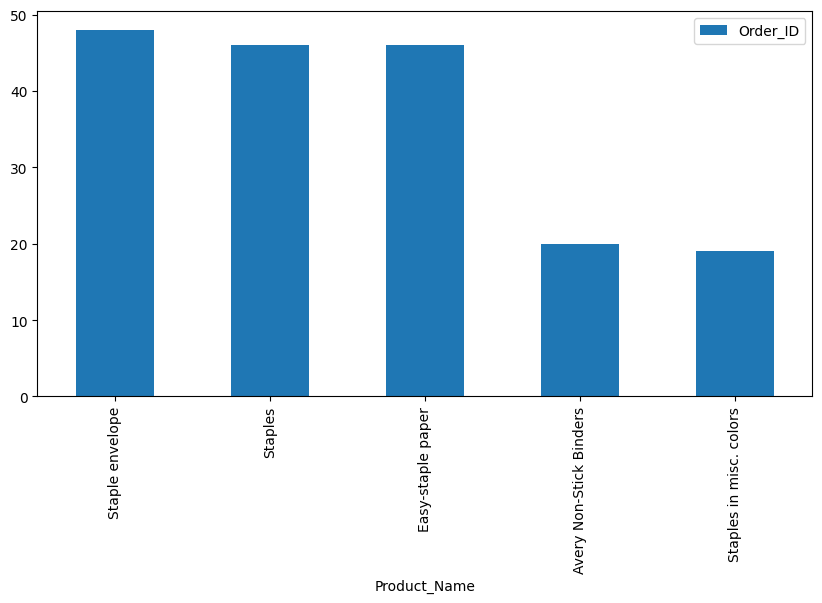

In [17]:
# menggunakan Pandas

popular_product.head().plot(kind = 'bar', figsize=(10,5))

<Axes: xlabel='Product_Name'>

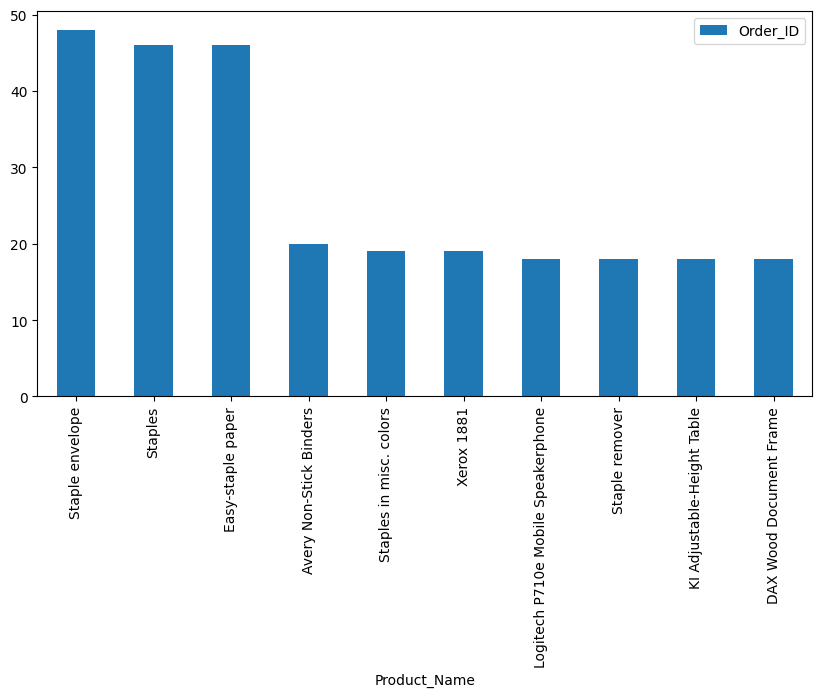

In [18]:
popular_product.head(10).plot(kind = 'bar', figsize=(10,5))

In [19]:
popular_product

,Order_ID
Product_Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1984,1
SanDisk Cruzer 8 GB USB Flash Drive,1
Xerox 20,1


In [20]:
market_share = pd.pivot_table(
  data=ss,
  index='Category',
  columns='Region',
  values='Sales',
  aggfunc='sum'
)
market_share

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


## PLOT

<Axes: xlabel='Category'>

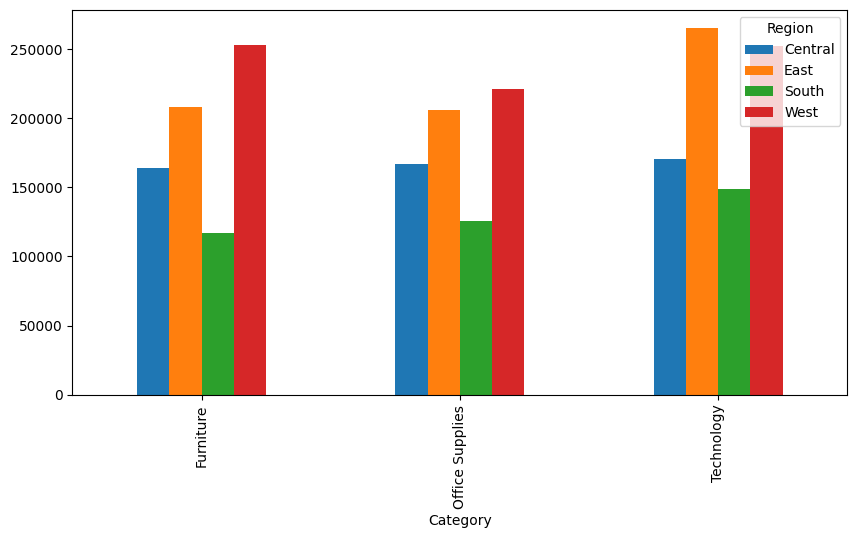

In [21]:
market_share.plot(kind='bar', figsize=(10,5))

## BAR STACKED

<Axes: xlabel='Category'>

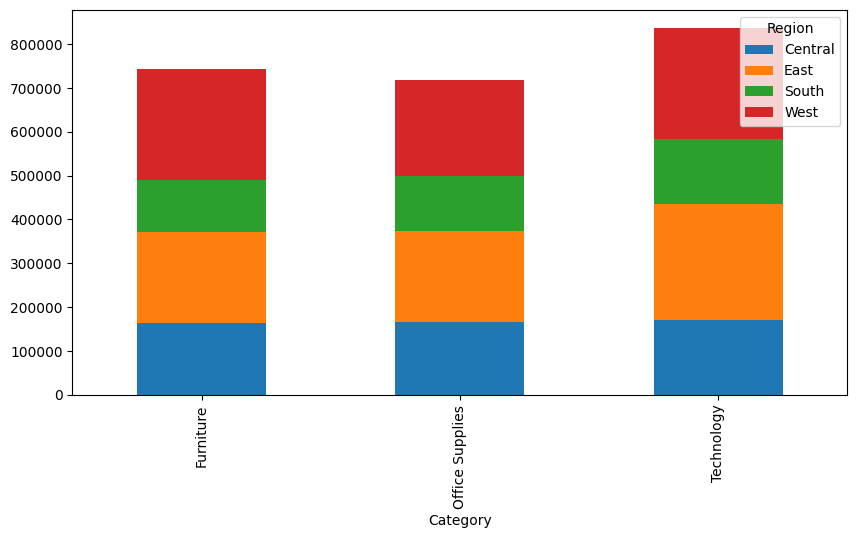

In [22]:
market_share.plot(kind='bar', stacked = True, figsize=(10,5))

In [23]:
market_share.unstack()

Region   Category       
Central  Furniture          163797.1638
         Office Supplies    167026.4150
         Technology         170416.3120
East     Furniture          208291.2040
         Office Supplies    205516.0550
         Technology         264973.9810
South    Furniture          117298.6840
         Office Supplies    125651.3130
         Technology         148771.9080
West     Furniture          252612.7435
         Office Supplies    220853.2490
         Technology         251991.8320
dtype: float64

In [24]:
market_share = market_share.unstack().reset_index()
market_share = market_share.rename(columns={0:'Sales'})
market_share

,Region,Category,Sales
0,Central,Furniture,163797.1638
1,Central,Office Supplies,167026.4150
2,Central,Technology,170416.3120
3,East,Furniture,208291.2040
4,East,Office Supplies,205516.0550
5,East,Technology,264973.9810
6,South,Furniture,117298.6840
7,South,Office Supplies,125651.3130
8,South,Technology,148771.9080
9,West,Furniture,252612.7435


## BARPLOT

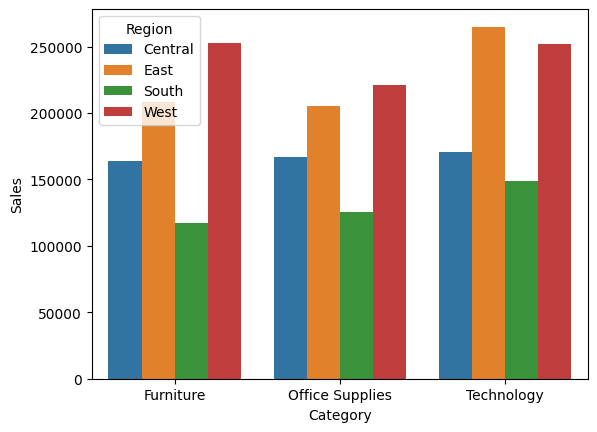

In [25]:
sns.barplot(data=market_share, x='Category', y='Sales', hue='Region')
plt.show()

## LINE CHART

In [26]:
ss.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [27]:
data = pd.pivot_table (
    data=ss,
    index='Order_Date',
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Sales
0,2017-01-03,16.448
1,2017-01-04,288.060
2,2017-01-05,19.536
3,2017-01-06,4407.100
4,2017-01-07,87.158


## LINEPLOT

<Axes: xlabel='Order_Date'>

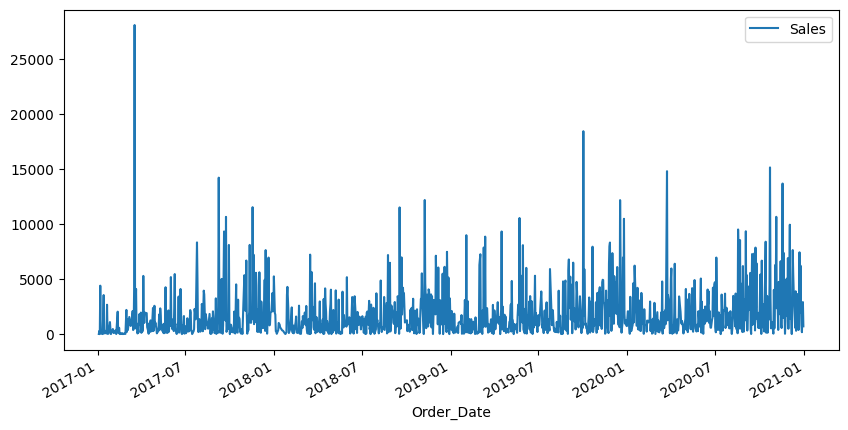

In [28]:
#Pandas

data.plot(kind='line', x='Order_Date', y='Sales', figsize=(10,5))

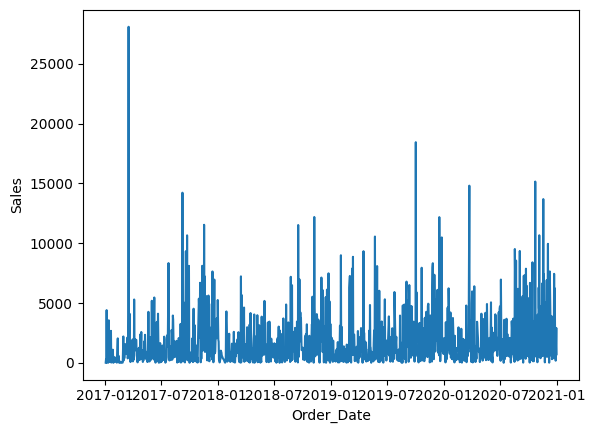

In [29]:
# Seaborn

sns.lineplot(data=data, x='Order_Date', y='Sales')
plt.show()

In [30]:
data = pd.pivot_table (
    data=ss,
    index= ['Order_Date', 'Category'],
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Category,Sales
0,2017-01-03,Office Supplies,16.448
1,2017-01-04,Office Supplies,288.060
2,2017-01-05,Office Supplies,19.536
3,2017-01-06,Furniture,2573.820
4,2017-01-06,Office Supplies,685.340


<Axes: xlabel='Order_Date', ylabel='Sales'>

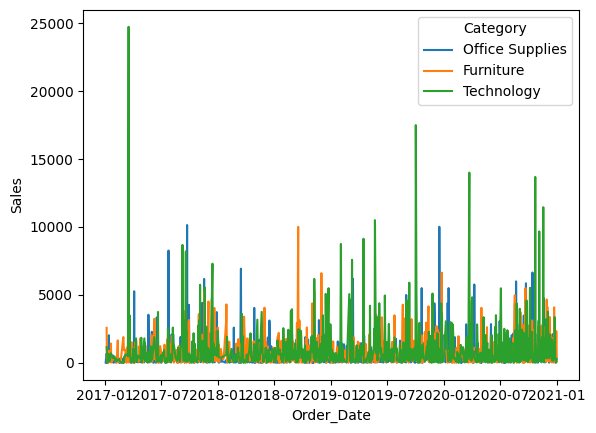

In [31]:
# Seaborn

sns.lineplot(data=data, x='Order_Date', y='Sales', hue= 'Category')

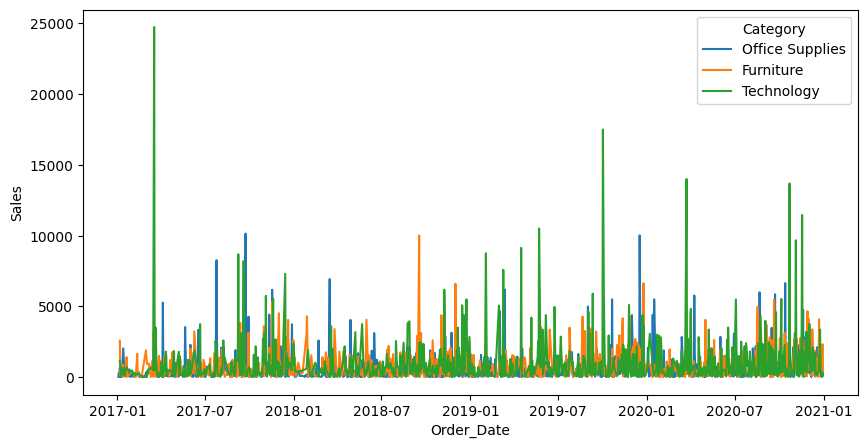

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='Order_Date', y='Sales', hue= 'Category')
plt.show()

## SCATTERPLOT

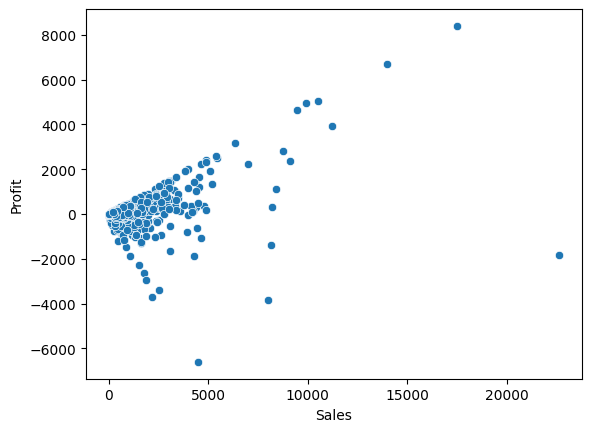

In [33]:
sns.scatterplot(ss, x='Sales', y='Profit')
plt.show()

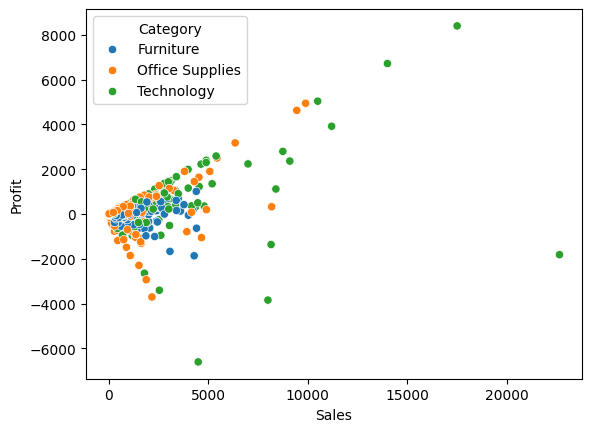

In [34]:
sns.scatterplot(ss, x='Sales', y='Profit', hue = 'Category')
plt.show()

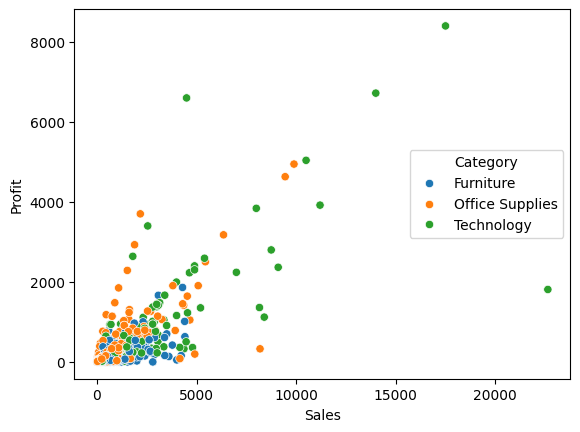

In [35]:
ss['Profit'] = ss['Profit'].abs()
sns.scatterplot(ss, x='Sales', y='Profit', hue = 'Category')
plt.show()

## *Seaborn Version Checking*

In [41]:
sns.__version__

'0.13.2'

## DISTRIBUTION PLOT = Displot

<ipython-input-36-652d1c0178d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss['Sales'])


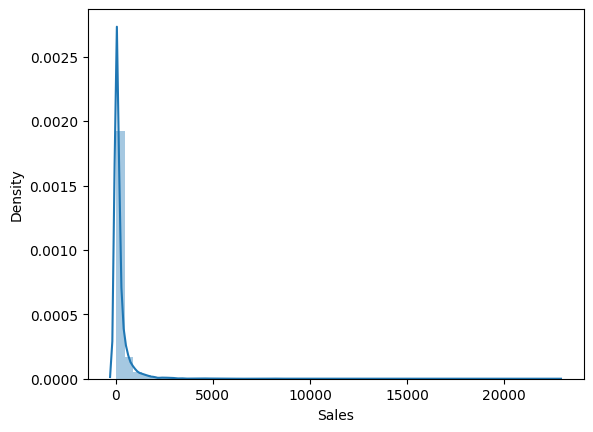

In [36]:
sns.distplot(ss['Sales'])
plt.show()

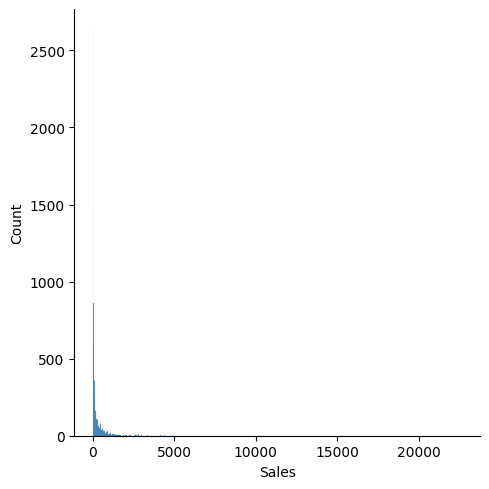

In [37]:
sns.displot(ss['Sales'])
plt.show()

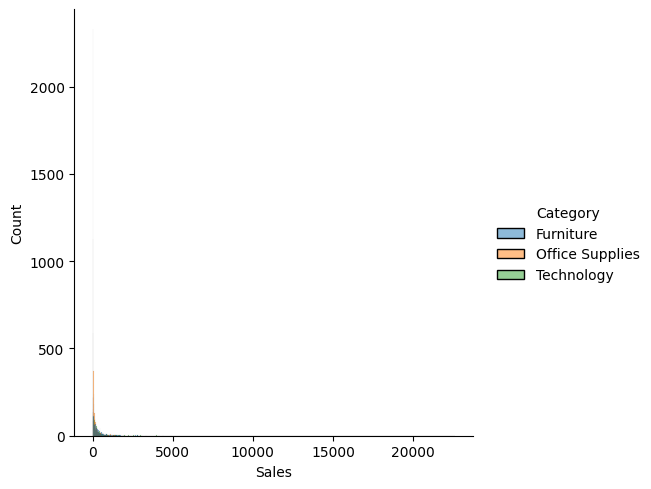

In [38]:
sns.displot(ss, x='Sales', hue = 'Category')
plt.show()

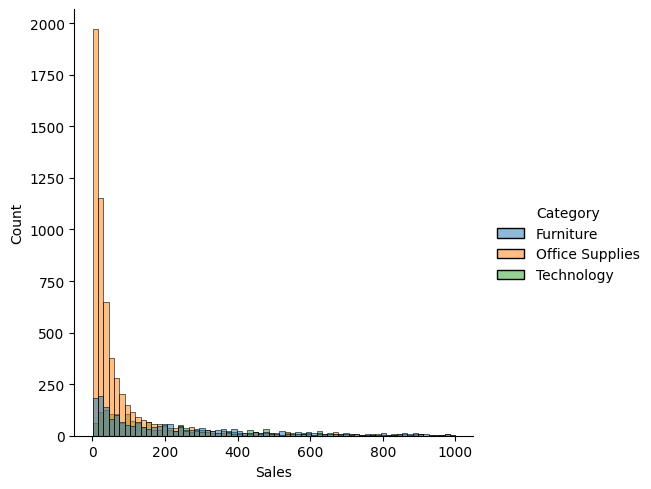

In [42]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', hue= 'Category')
plt.show()

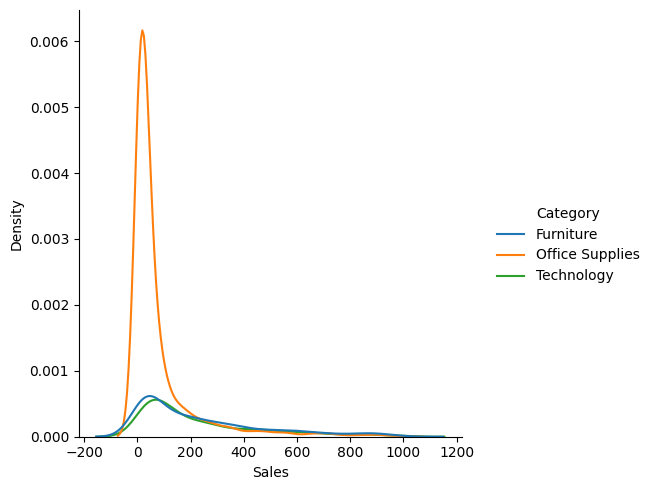

In [43]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', hue= 'Category', kind = 'kde')
plt.show()

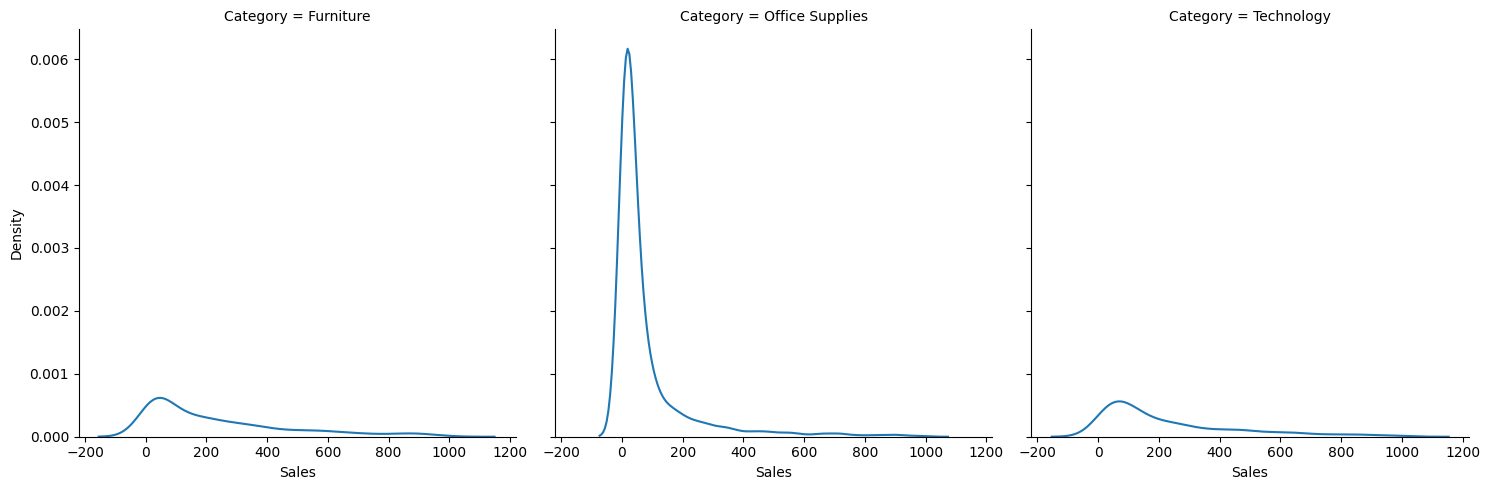

In [44]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', col= 'Category', kind = 'kde')
plt.show()

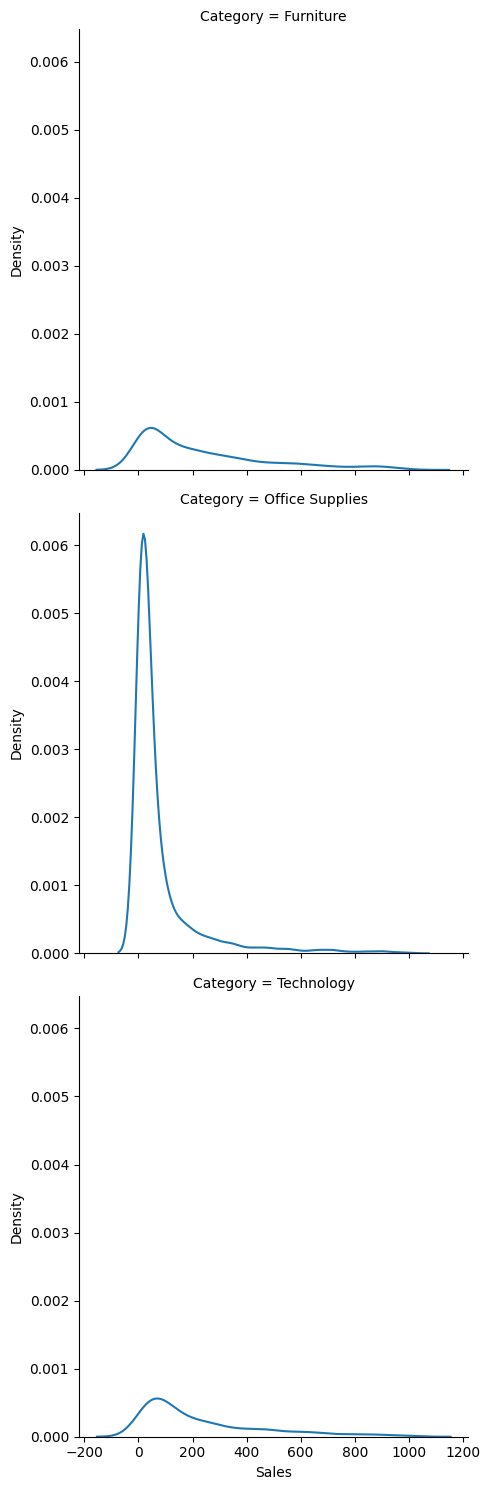

In [45]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', row= 'Category', kind = 'kde')
plt.show()

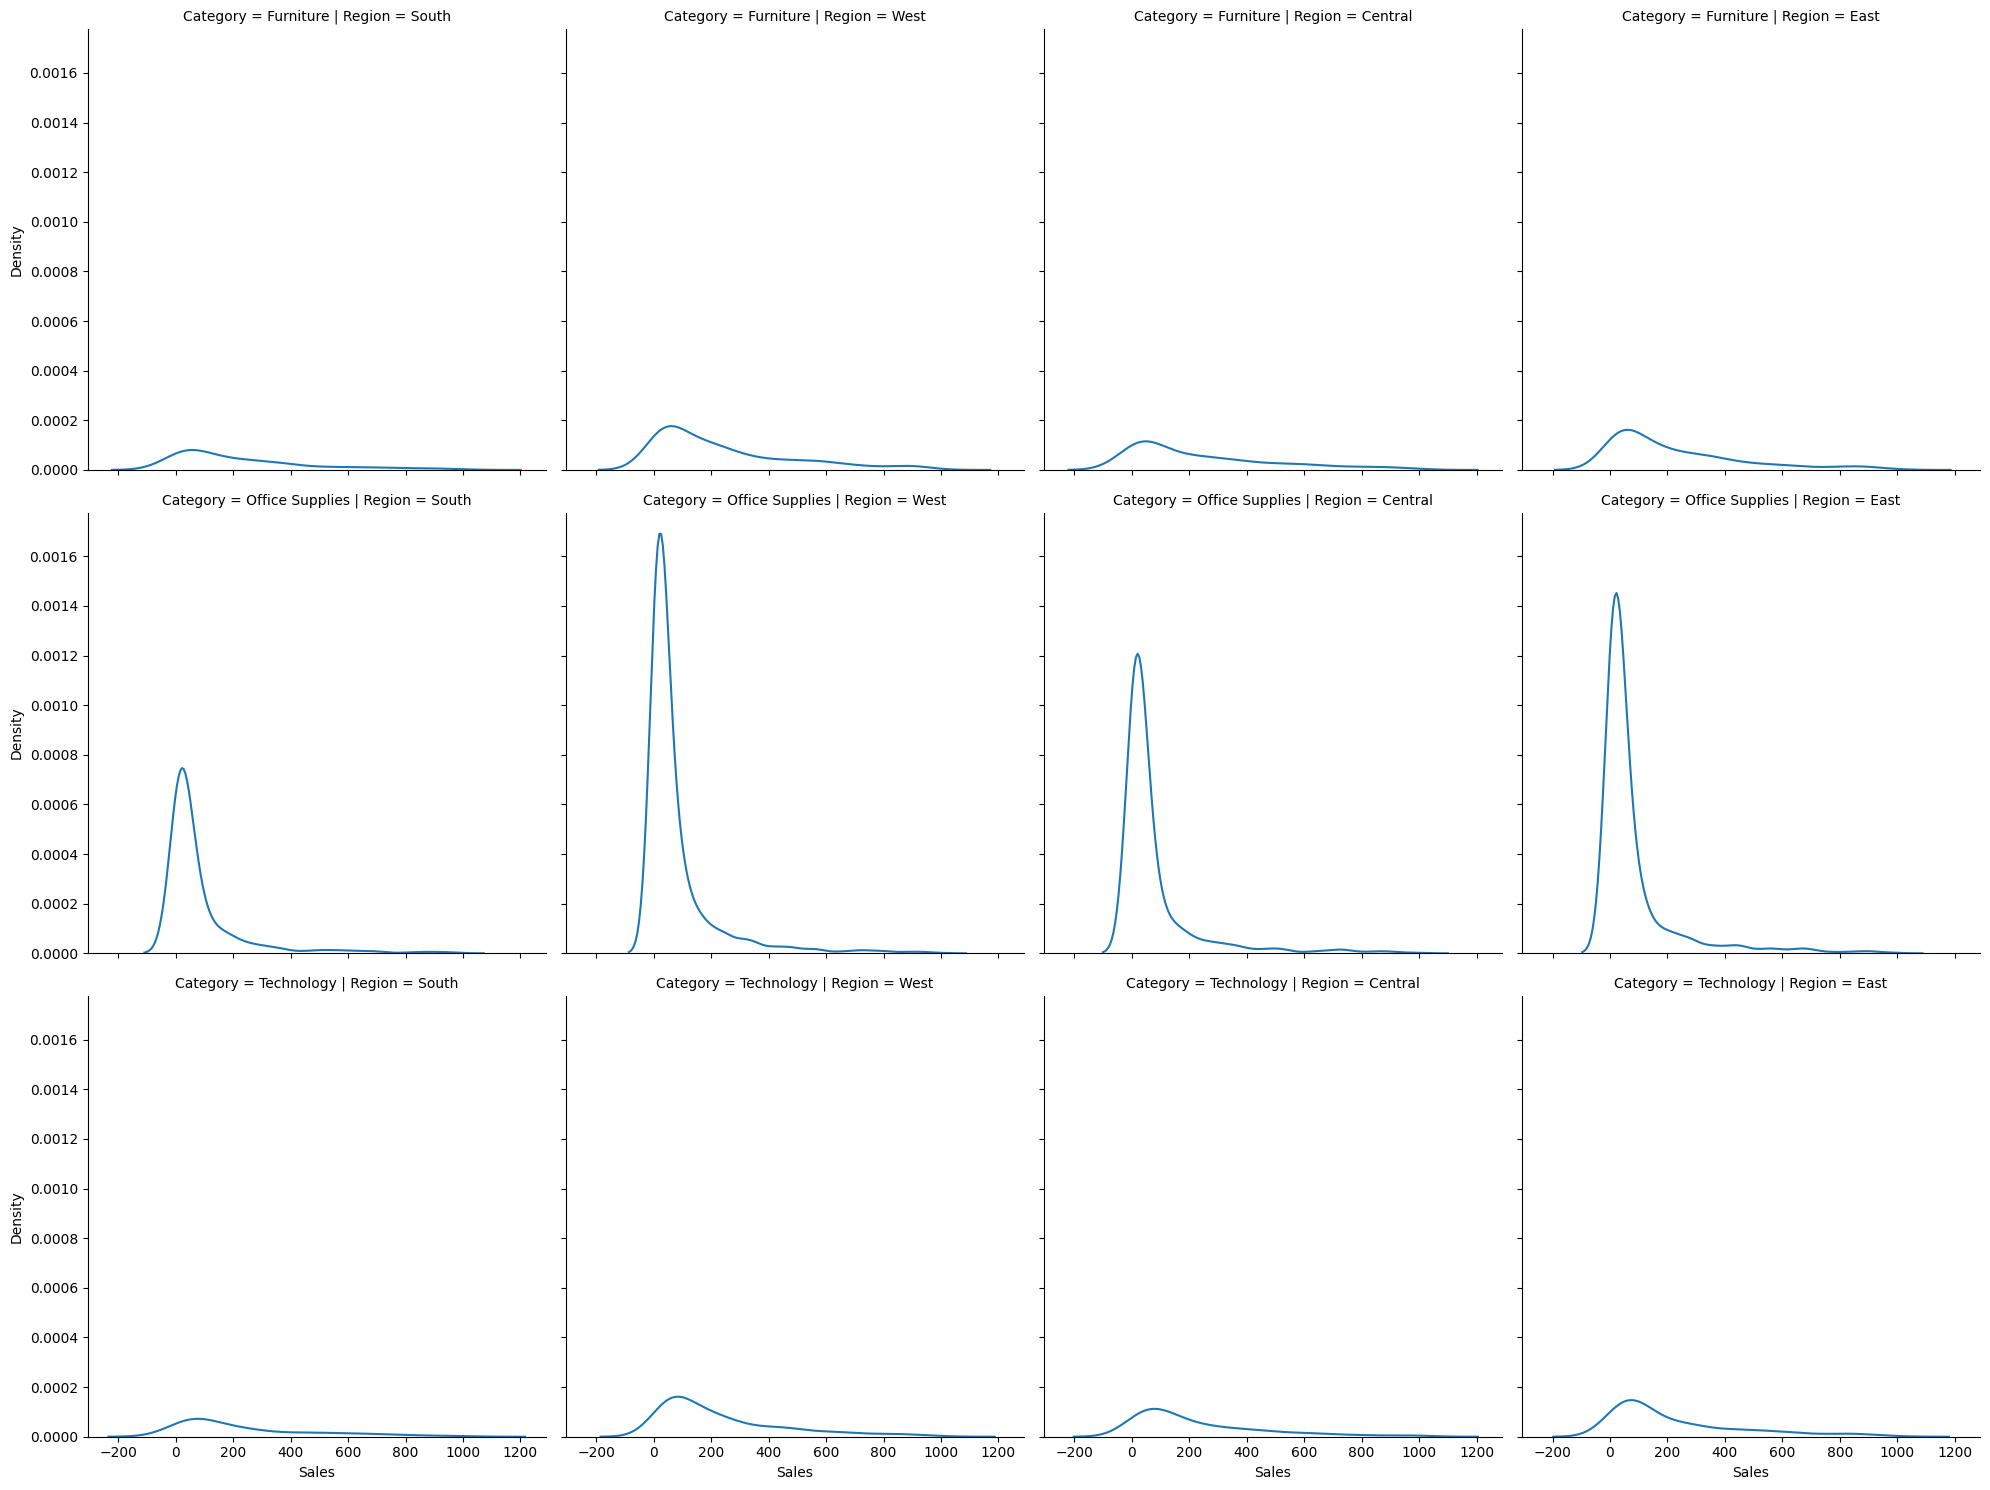

In [46]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', col= 'Region', row= 'Category', kind = 'kde')
plt.show()

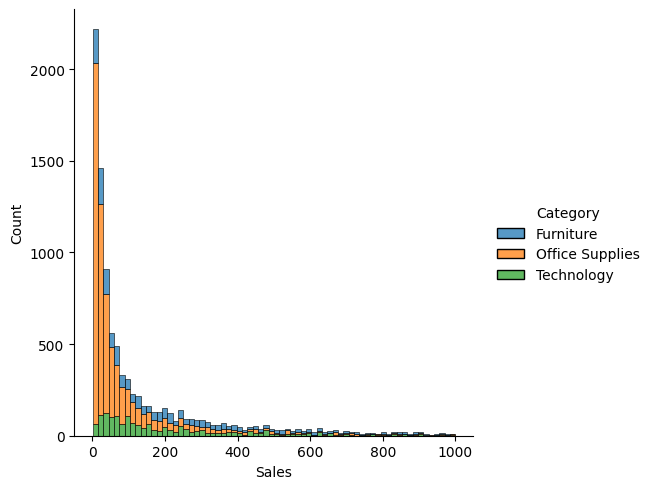

In [47]:
sns.displot(data = ss[ss['Sales'] <= 1000], x= 'Sales', hue= 'Category', multiple= 'stack')
plt.show()

## **HEATMAP**

In [48]:
data = pd.pivot_table(
  data=ss,
  index='State',
  columns='Category',
  values='Sales',
  aggfunc='sum'
)
data

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,6332.4800,4209.080,8969.080
Arizona,13525.2910,10005.825,11750.885
Arkansas,3187.5500,4565.330,3925.250
California,156064.6015,142351.948,159271.082
Colorado,13243.0370,7898.752,10966.329
Connecticut,5174.9870,5418.340,2791.030
Delaware,4759.3190,8129.530,14562.220
District of Columbia,1346.5800,138.520,1379.920
Florida,22987.0380,19518.634,46968.036


<Axes: xlabel='Category', ylabel='State'>

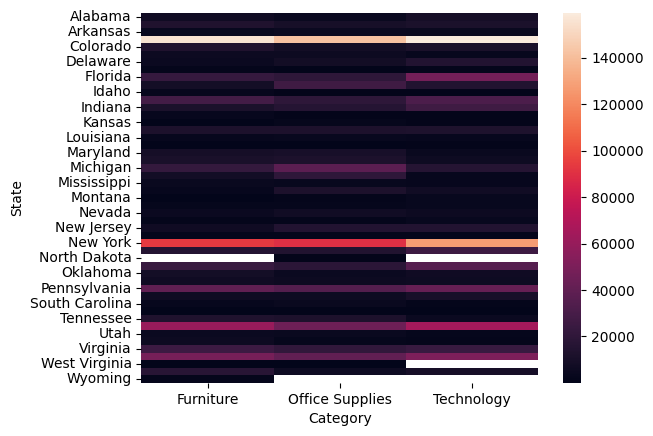

In [49]:
sns.heatmap(data)

<Axes: xlabel='Category', ylabel='State'>

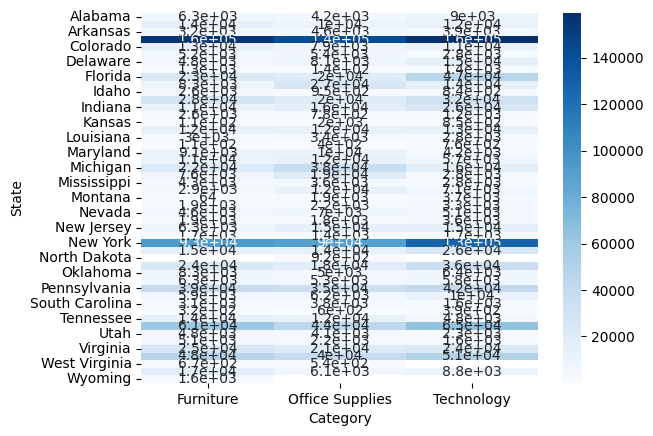

In [51]:
sns.heatmap(data, annot= True, cmap='Blues')

<Axes: xlabel='Category', ylabel='State'>

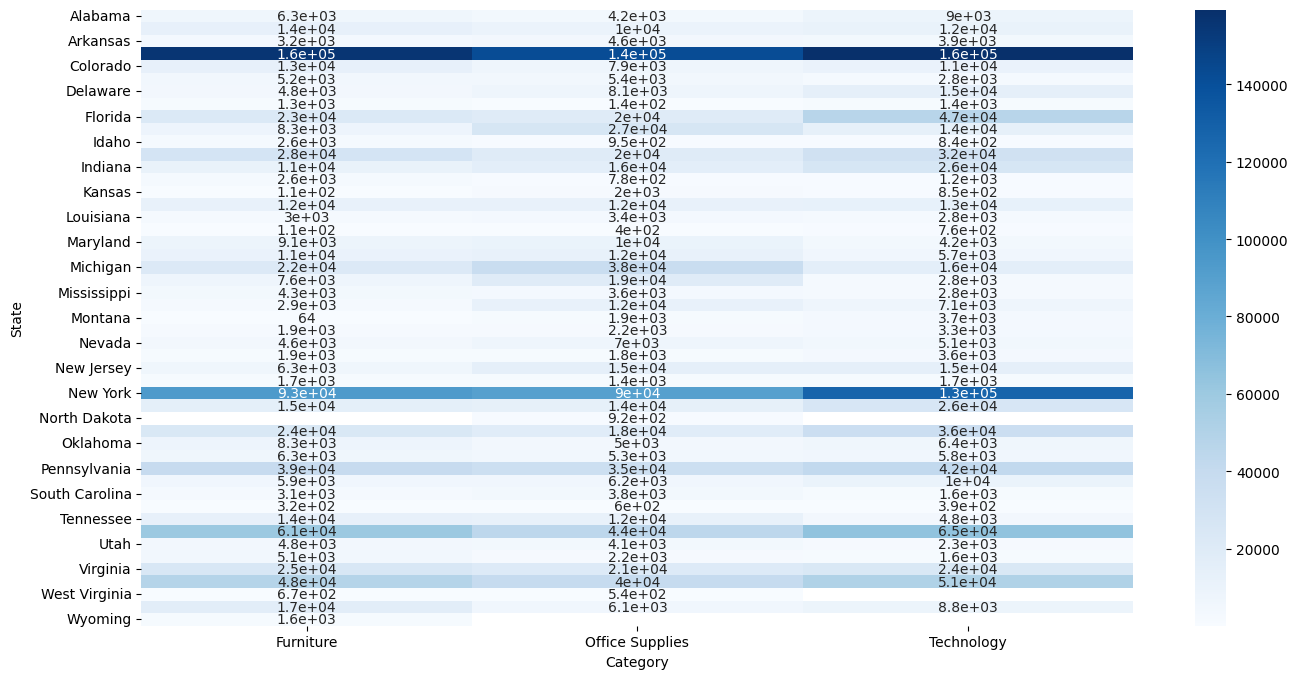

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(data, annot= True, cmap='Blues')

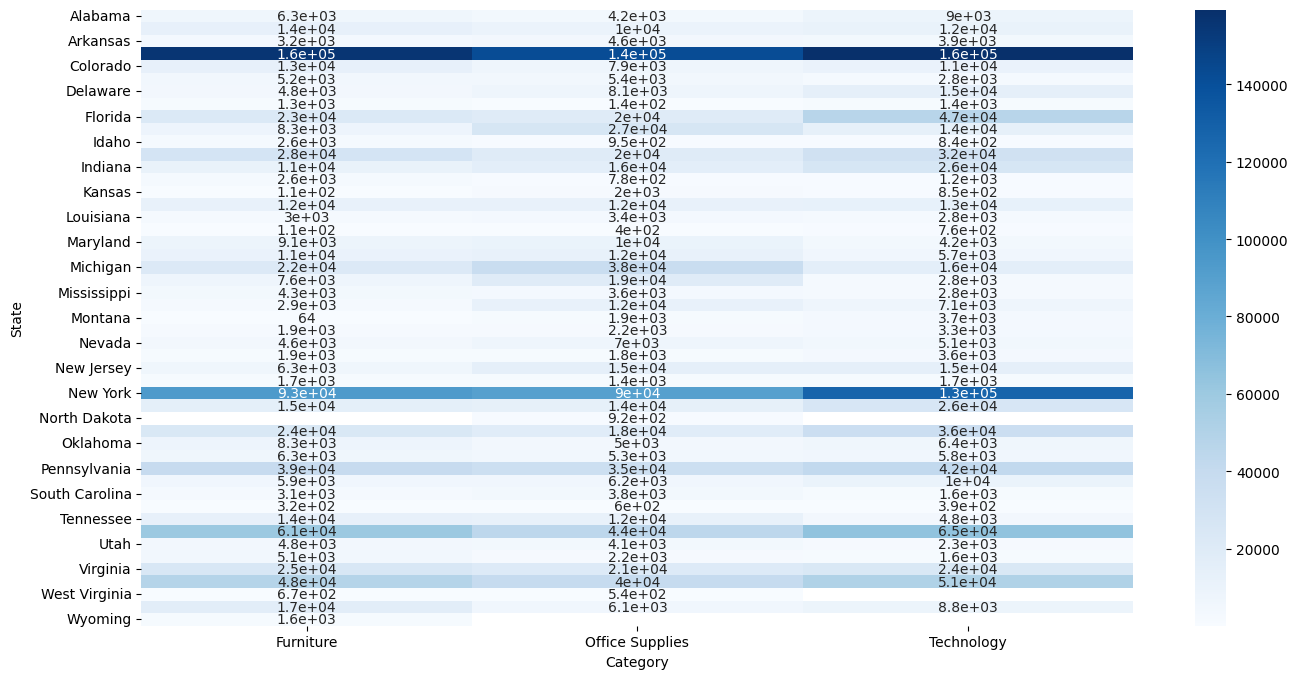

In [54]:
plt.figure(figsize=(16,8))
sns.heatmap(data, annot= True, cmap='Blues')
plt.show()